# step 5

# Logistic Regression Pipeline

In [51]:
import pandas as pd
import numpy as np  
import joblib


In [52]:
artifacts = joblib.load('/home/jedi/Desktop/credit risk scoring/Credit_Risk_Scoring/data/preprocessed_artifacts.pkl')

df = artifacts["df"]
TARGET_COL = artifacts["TARGET_COL"]
numeric_features = artifacts["numeric_features"]
categorical_features = artifacts["categorical_features"]
preprocessor = artifacts["preprocessor"]
X_train = artifacts["X_train"]
X_test = artifacts["X_test"]
y_train = artifacts["y_train"]
y_test = artifacts["y_test"]


In [53]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32000 entries, 5891 to 26416
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               32000 non-null  object
 1   age                  32000 non-null  int64 
 2   marital_status       32000 non-null  object
 3   education            32000 non-null  object
 4   nb_depend_child      32000 non-null  int64 
 5   employ_status        32000 non-null  object
 6   yrs_current_job      32000 non-null  int64 
 7   yrs_employed         32000 non-null  int64 
 8   net_income           32000 non-null  int64 
 9   spouse_work          32000 non-null  object
 10  spouse_income        32000 non-null  int64 
 11  residential_status   32000 non-null  object
 12  yrs_current_address  32000 non-null  int64 
 13  loan_amount          32000 non-null  int64 
 14  loan_purpose         32000 non-null  object
 15  loan_length          32000 non-null  int64 
 16  collat

In [54]:
print(y_train.info())

<class 'pandas.core.series.Series'>
Index: 32000 entries, 5891 to 26416
Series name: writeoff
Non-Null Count  Dtype 
--------------  ----- 
32000 non-null  object
dtypes: object(1)
memory usage: 500.0+ KB
None


In [55]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

logreg_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)
y_prob = logreg_model.predict_proba(X_test)[:, 1]   # احتمال کلاس 1


In [56]:
print("Logistic Regression")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Logistic Regression
              precision    recall  f1-score   support

          no       0.88      0.81      0.85      4377
         yes       0.79      0.87      0.83      3623

    accuracy                           0.84      8000
   macro avg       0.84      0.84      0.84      8000
weighted avg       0.84      0.84      0.84      8000

ROC-AUC: 0.8592439678693313


# Random Forest Pipeline:

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight='balanced'
    ))
])

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


In [58]:
print("\nRandom Forest")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


Random Forest
              precision    recall  f1-score   support

          no       0.88      0.83      0.86      4377
         yes       0.81      0.86      0.84      3623

    accuracy                           0.85      8000
   macro avg       0.85      0.85      0.85      8000
weighted avg       0.85      0.85      0.85      8000

ROC-AUC: 0.8668906752993513


# XGBoost or LightGBM

In [99]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

xgb_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss'
    ))
])

le = LabelEncoder() # 0,1
yg_train = le.fit_transform(y_train)
yg_test = le.transform(y_test)

xgb_model.fit(X_train, yg_train)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]



In [60]:
from lightgbm import LGBMClassifier

lgb_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        class_weight='balanced'
    ))
])

lgb_model.fit(X_train, yg_train)
y_pred_lgb = lgb_model.predict(X_test)
y_prob_lgb = lgb_model.predict_proba(X_test)[:, 1]


[LightGBM] [Info] Number of positive: 14491, number of negative: 17509
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/home/jedi/miniconda3/envs/ds_lab/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/jedi/miniconda3/envs/ds_lab/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [61]:


print("\nXGBoost ")
print(classification_report(yg_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(yg_test, y_prob_xgb))



XGBoost 
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      4377
           1       0.80      0.89      0.84      3623

    accuracy                           0.85      8000
   macro avg       0.85      0.85      0.85      8000
weighted avg       0.85      0.85      0.85      8000

ROC-AUC: 0.8669043593556789


# step 6
### note:
or model is balance but for sure we do Class Imbalance step.

we have 2 method to do it :

1-class_weight='balanced:

this method give more weight to first class

In [84]:
# ex for lg
logreg_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(
        max_iter=1000,
        class_weight='balanced'
    ))
])

#ex. for RF
rf_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=300,
        class_weight='balanced',
        random_state=42
    ))
])
rf_model.fit(X_train, y_train) 

#ex. for XGB
xgb_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss'
    ))
])

2- secound method is SMOTE:
make artifical datas for first class

preprocessor → SMOTE → Model (this have specific reason)

In [63]:
#  install imbalanced-learn

# %pip install imbalanced-learn

In [64]:

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


In [65]:
smote_model = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=1000))
])

smote_model.fit(X_train, y_train)

y_pred_sm = smote_model.predict(X_test)
y_prob_sm = smote_model.predict_proba(X_test)[:, 1]


In [66]:
from collections import Counter

print("Before SMOTE:", Counter(y_train))


Before SMOTE: Counter({'no': 17509, 'yes': 14491})


In [67]:
#is this method helpful?

print("No-SMOTE Logistic Regression")
print(classification_report(y_test, y_pred))

print("\nWith SMOTE")
print(classification_report(y_test, y_pred_sm))


No-SMOTE Logistic Regression
              precision    recall  f1-score   support

          no       0.88      0.81      0.85      4377
         yes       0.79      0.87      0.83      3623

    accuracy                           0.84      8000
   macro avg       0.84      0.84      0.84      8000
weighted avg       0.84      0.84      0.84      8000


With SMOTE
              precision    recall  f1-score   support

          no       0.88      0.81      0.85      4377
         yes       0.79      0.87      0.83      3623

    accuracy                           0.84      8000
   macro avg       0.84      0.84      0.84      8000
weighted avg       0.84      0.84      0.84      8000



# step 7

What is Confusion Matrix?
Precision / Recall / F1-score for Default

ROC-AUC

Precision-Recall Curve (important for imbalanced datas)

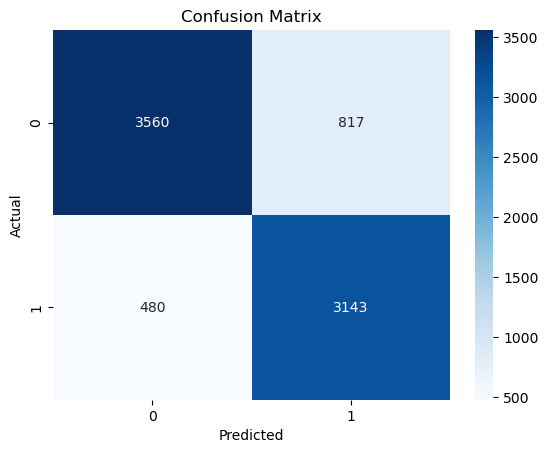

In [68]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [69]:
# 2 Precision, Recall, F1-score

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.88      0.81      0.85      4377
         yes       0.79      0.87      0.83      3623

    accuracy                           0.84      8000
   macro avg       0.84      0.84      0.84      8000
weighted avg       0.84      0.84      0.84      8000



# ROC-AUC
### AUC = Area Under Curve


In [70]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC =", roc_auc)

from sklearn.metrics import RocCurveDisplay




ROC-AUC = 0.8592439678693313


# ROC Curve
or target is "yes or no" it need "0,1"
so i cm this code.

In [71]:
# from sklearn.metrics import RocCurveDisplay

# RocCurveDisplay.from_predictions(y_test, y_prob)
# plt.title("ROC Curve")
# plt.show()


# Precision–Recall Curve
same problem

In [72]:
# from sklearn.metrics import PrecisionRecallDisplay

# PrecisionRecallDisplay.from_predictions(y_test, y_prob)
# plt.title("Precision-Recall Curve")
# plt.show()


In [73]:
# used at step 8(threshold_and_business_analysis.ipynb)
import joblib

model_artifacts = {
    #datas
    "X_train": X_train,
    "X_test": X_test,
    "y_train": y_train,
    "y_test": y_test,

    #models
    "logreg_model": logreg_model,
    "rf_model": rf_model,
    "smote_model": smote_model,

    # outpot of logreg model
    "y_pred_logreg": y_pred,
    "y_prob_logreg": y_prob,

    # outpot of RF model
    "y_pred_rf": y_pred_rf,
    "y_prob_rf": y_prob_rf,

    # outpot of SMOTE + Logistic model
    "y_pred_smote": y_pred_sm,
    "y_prob_smote": y_prob_sm,
}

joblib.dump(
    model_artifacts,
    "/home/jedi/Desktop/credit risk scoring/Credit_Risk_Scoring/data/modeling_artifacts.pkl"
)



['/home/jedi/Desktop/credit risk scoring/Credit_Risk_Scoring/data/modeling_artifacts.pkl']

# step 9

In [ ]:

(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=300,
        class_weight='balanced',
        random_state=42
    ))
])

rf_model.fit(X_train, y_train) 

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [90]:
rf = rf_model.named_steps['model']          # RandomForest inside of Pipeline
ohe = rf_model.named_steps['preprocess'].named_transformers_['cat'].named_steps['encoder']


In [91]:
# numeric col's name
num_cols = numeric_features

#categorical col's name after one-hot encoding
cat_cols = ohe.get_feature_names_out(categorical_features)

# combine all col's
all_features = list(num_cols) + list(cat_cols)


In [92]:
#take importance

importances = rf.feature_importances_



In [93]:
import pandas as pd

fi_df = pd.DataFrame({
    'feature': all_features,
    'importance': importances
}).sort_values(by='importance', ascending=False)


In [94]:
fi_df.head(20)


,feature,importance
36,collateral_yes,0.104147
35,collateral_no,0.102075
1,nb_depend_child,0.088121
7,loan_amount,0.081727
8,loan_length,0.067250
14,marital_status_widowed,0.060510
0,age,0.058195
6,yrs_current_address,0.051998
3,yrs_employed,0.051352
11,marital_status_divorced,0.038365


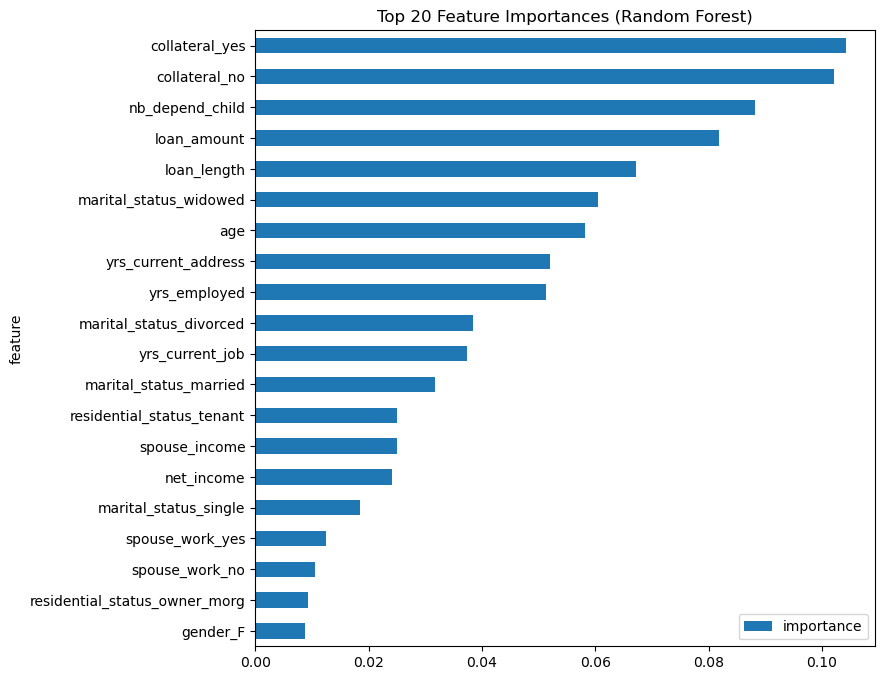

In [95]:
import matplotlib.pyplot as plt

fi_df.head(20).plot(kind='barh', x='feature', y='importance', figsize=(8, 8))
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances (Random Forest)")
plt.show()
